<img src="Figuras - Desafio 4/logo.png" style="width:1450px;height:250px"/>

# Ilum Escola de Ciência
### Curso: Termodinâmica Avançada
### Prof: Amauri Jardim de Paula
### Alunos: Gabriel Pereira e Isabela Beneti
### Desafio 4

#
# Descrição do desafio
O quarto desafio para solução do problema principal da disciplina envolve:
### **A operação do ciclo Rankine a partir da energia da combustão calculada na atividade 3.**

Considerando esse ciclo de Rankine um ciclo ideal

# Problemas
##### Para tal, alguns aspectos importantes devem ser considerados.:
##### A. Defina como funciona o ciclo de Rankine.
##### B. Use valores de entalpia para água-vapor de água tabelados para cálculo da eficiência
##### C.  Considere se o ciclo fosse de Carnot. Nesse caso, qual a eficiência teórica?


#
# Resoluções

## Importações

In [1]:
# Rode essa célula antes de rodar as seguintes, pois elas se utilizam das seguintes bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes_desafio_4 import *

## Problema A

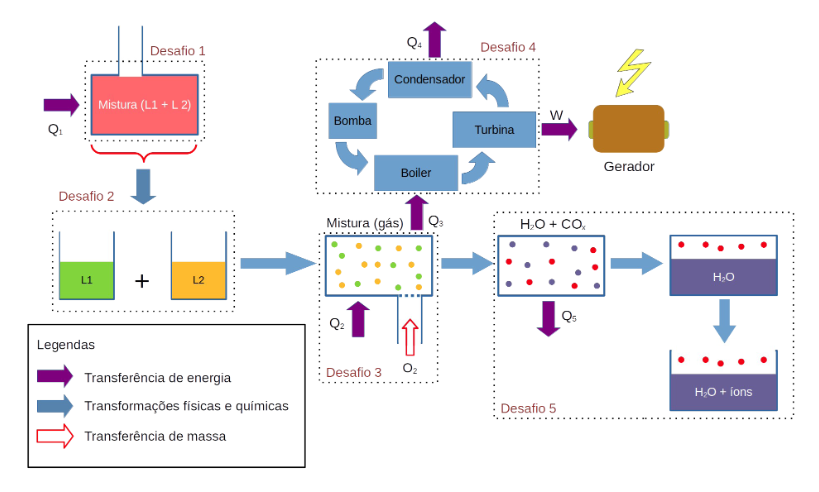

## Recapitulação

Antes de começarmos o quarto desafio, é importante retomar o que foi feito nos desafios anteriores e o que obtemos como resultado deles:

A nossa mistura inicialmente consistia em uma tonelada de água com etanol a 40% v/v e, por meio da destilação fracionada, separamo-la em etanol enriquecido e água pura. Após disso, evaporamos o etanol enriquecido a 81.54°C, o que gerou **384.73 kg de etanol enriquecido gasoso**. Por fim, realizamos eletrólise da água, através da qual extraímos **47.85 kg de hidrogênio gasoso**. Tudo isso foi feito à pressão constante de 1 atm.

A partir dos valores de massa, temperatura e pressão, no último desafio, obtemos a entalpia e a entropia geradas pela combustão do etanol enriquecido e do hidrogênio: respectivamente -17376284.38 kJ e −5279693.78 𝑘 𝐽/𝐾.

Com isso, no presente desafio, definiremos as características do nosso ciclo de Rankine, incluindo massa de água envolvida, os valores de temperatura da fonte quente e da fonte fria e, por fim, a eficiência do nosso ciclo (e compará-la com eficiência teórica do ciclo de Carnot).



O ciclo de Rankine é um ciclo termodinâmico comumente utilizado em usinas de energia térmica para gerar eletricidade. Consiste em quatro etapas principais: aquecimento, expansão, resfriamento e compressão. Cada etapa é associada a uma fórmula específica para o cálculo da entropia e da temperatura. Vamos explicar cada uma etapa separadamente

## Problema A

### Boiler

Nesta etapa, água é aquecida em uma caldeira para formar vapor de alta pressão e temperatura. A fórmula relacionada ao cálculo da entropia nessa etapa é geralmente ignorada, assumindo-se que a entropia do líquido é negligível em comparação com a entropia do vapor. No entanto, a temperatura do vapor é calculada usando a equação de saturação de vapor, como a equação de Clausius-Clapeyron.

https://learncheme.com/

In [2]:
ARQUIVO_EXCEL = "Dados - Desafio 4/diagrama_TS - vapor table.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 12, 13] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_TS = pd.read_excel( # Criando o Data Frame do diagrama TS da água
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_TS

,"T, °C",sf.1,sg.1
0,0.01,0.0000,9.1571
1,2.00,0.0305,9.1043
2,5.00,0.0761,9.0266
3,10.00,0.1510,8.9016
4,15.00,0.2244,8.7822
5,20.00,0.2965,8.6680
6,25.00,0.3672,8.5588
7,30.00,0.4367,8.4541
8,35.00,0.5051,8.3539
9,40.00,0.5723,8.2578


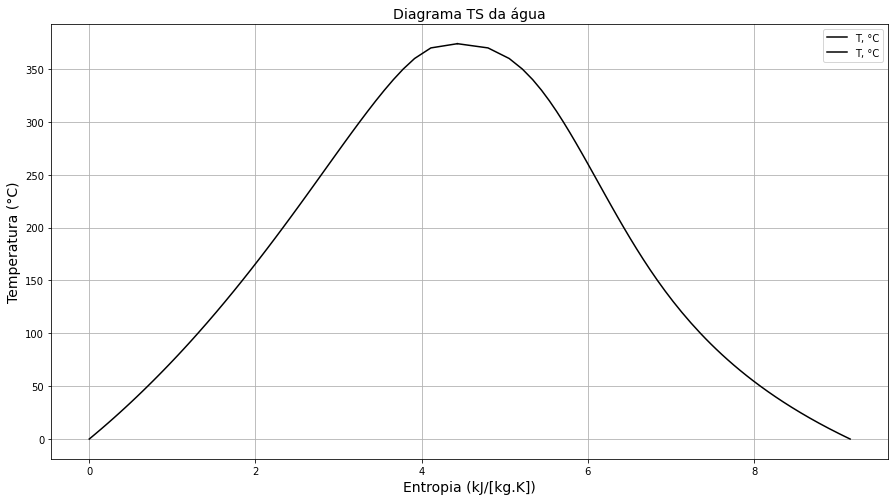

In [3]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, °C', ax = ax1, c = 'black')
df_TS.plot('sg.1', 'T, °C', ax = ax1, c = 'black')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)
plt.title("Diagrama TS da água",
          fontsize=14)

plt.grid()

plt.show()

In [4]:
ARQUIVO_EXCEL = "Dados - Desafio 4/Água Líquida - Tabela.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 14] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_H2O = pd.read_excel( # Criando o Data Frame do diagrama TS da água
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_H2O.head()

,T,s.3
0,0,0.0001
1,20,0.2956
2,40,0.5705
3,60,0.8285
4,80,1.0720


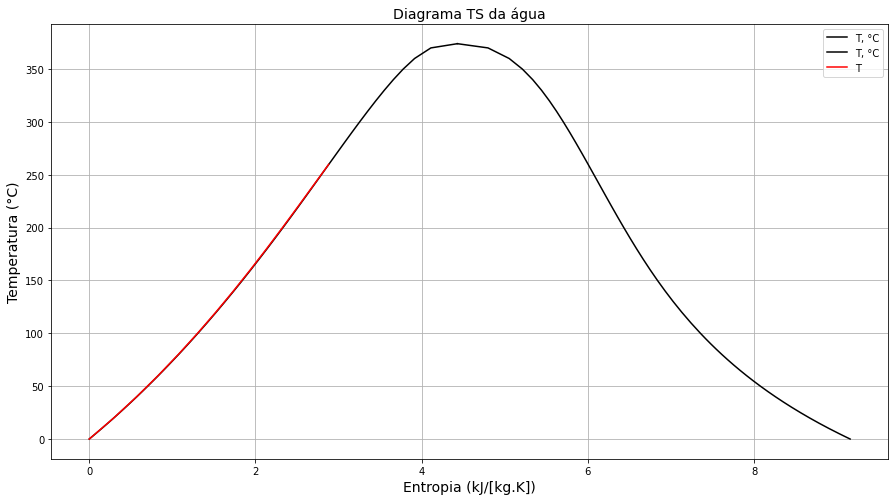

In [5]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, °C', ax = ax1, c = 'black')
df_TS.plot('sg.1', 'T, °C', ax = ax1, c = 'black')
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)
plt.title("Diagrama TS da água",
          fontsize=14)

plt.grid()

plt.show()

In [6]:
ARQUIVO_EXCEL = "Dados - Desafio 4/Calor específico - Água.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS_1 = [0, 2] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0
COLUNAS_CONTENDO_OS_DADOS_2 = [6, 8] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_cal_esp_vap = pd.read_excel( # Criando o Data Frame do diagrama TS da água
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS_1,
)

df_cal_esp_liq = pd.read_excel( # Criando o Data Frame do diagrama TS da água
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS_2,
)

In [7]:
entropia_por_temperatura_vapor(1000, df_cal_esp_vap, 262.5, 6)

         T      H
1    262.5  1.857
2    275.0  1.859
3    300.0  1.864
4    325.0  1.871
5    350.0  1.880
6    375.0  1.890
7    400.0  1.901
8    450.0  1.926
9    500.0  1.954
10   550.0  1.984
11   600.0  2.015
12   650.0  2.047
13   700.0  2.080
14   750.0  2.113
15   800.0  2.147
16   850.0  2.182
17   900.0  2.217
18   950.0  2.252
19  1000.0  2.288
[ 535.65  548.15  573.15  598.15  623.15  648.15  673.15  723.15  773.15
  823.15  873.15  923.15  973.15 1023.15 1073.15 1123.15 1173.15 1223.15
 1273.15]


7.744062478395234

In [11]:
H_boiler = entalpia_boiler(20, 262.5, 1000, 1662.5, 4100, df_cal_esp_liq, df_cal_esp_vap)

      T.1     H.1
2    20.0  4.1844
3    25.0  4.1816
4    30.0  4.1801
5    40.0  4.1796
6    50.0  4.1815
7    60.0  4.1851
8    70.0  4.1902
9    80.0  4.1969
10   90.0  4.2053
11  100.0  4.2157
12  110.0  4.2283
13  120.0  4.2435
14  140.0  4.2826
15  160.0  4.3354
16  180.0  4.4050
17  200.0  4.4958
18  220.0  4.6146
19  240.0  4.7719
20  260.0  4.9856
         T      H
1    262.5  1.857
2    275.0  1.859
3    300.0  1.864
4    325.0  1.871
5    350.0  1.880
6    375.0  1.890
7    400.0  1.901
8    450.0  1.926
9    500.0  1.954
10   550.0  1.984
11   600.0  2.015
12   650.0  2.047
13   700.0  2.080
14   750.0  2.113
15   800.0  2.147
16   850.0  2.182
17   900.0  2.217
18   950.0  2.252
19  1000.0  2.288


In [12]:
H_cond = entalpia_condensador(-2454.1, 4100)

In [13]:
 eficiencia_rankine(H_boiler, H_cond)

0.4186092308844036

In [14]:
eficiencia_ciclo_carnot(1000,20)

0.98

Do que precisamos:

- Uma função que calcule o ponto de TS após a evaporação da água.
- Uma função que calcule os valores no gráfico TS para determinadas temperaturas de um vapor.
- Uma função que calcule a entalpia gasta em um aumento de temperatura isobárico do líquido.
- Uma função que calcule a entalpia de uma evaporação.
- Uma função que calcule a entalpia gasta em um aumento de temperatura isobárico do vapor.
- Uma função que calcule a entalpia da condensação.
- Uma função que calcule a eficiência do ciclo.
- Uma função que calcule a eficiência do ciclo ideal de carnot.

### Turbina 
O vapor de alta pressão gerado na caldeira é direcionado para uma turbina, onde se expande e realiza trabalho mecânico. Durante essa expansão adiabática, a entropia do vapor é constante. A temperatura do vapor na saída da turbina é calculada usando a fórmula de expansão adiabática, que relaciona as temperaturas e pressões antes e depois da expansão.

### Condensador 
O vapor de baixa pressão que sai da turbina é enviado para um condensador, onde é resfriado e condensado em água líquida. Nessa etapa, a entropia do vapor aumenta devido à transferência de calor com o ambiente. A temperatura do vapor é calculada usando a equação de conservação de energia, que leva em consideração o calor trocado e as mudanças de entalpia e entropia.

### Bomba
A água líquida condensada é pressurizada por uma bomba para retornar à caldeira, onde será aquecida novamente. Durante a compressão adiabática realizada pela bomba, a entropia da água é constante. A temperatura da água é geralmente considerada constante durante a compressão adiabática.

## Problema B

## Problema C

# Acesse o repositório do projeto!

Para melhor compreensão de cade etapa e de cada escolha do nosso projeto, acesse, clicando aqui ou no link abaixo, nosso [Repositório do Github](https://github.com/benetao/Termodinamica_Avancada), onde estão armazenados todos os notebooks e informações referentes aos desafios:

https://github.com/benetao/Termodinamica_Avancada

#
## Referências
- Livro An Introduction to Thermal Physics, Daniel V. Schroeder, Editora Addison-Wesley.
- Livro Physical Chemistry: A Molecular Approach, Donald A. McQuarrie, Editora Univesity Science Books.
        Seções 19-10, 10-11 e 23-1.
- Livro Richard Feynman, Lições de Física Vol 1, Editora Bookman.
        Capítulo de Teoria Cinética dos Gases